CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.

### Task 0: (3 points)

What is the difference between the two sets of train/validation sets? Write your answer here:

### Ans: 

The valid_2 dataset is highly unbalanced. There are 7000 odd entries of which 6388 are no and 846 are yes. This is highly skewed towards a no prediction.
Also the train_2 dataset is the heaviest with 28000 entries.


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.  Answer for bullet one :
    The features having continuous numeric values are age,balance,day,duration,campaign,pdays,previous
2.  Answer for bullet two :
    The categorical features are job,marital,education,default,housing,loan,contact,month,poutcome,y
    To identify the categorical features I checked their data type and except the final prediction ("y") column, I passed all
    those to a function called one_hot which I wrote. In this function, using pd.get_dummies we create a one hot encoding 
    scheme for all the categorical data. 
3.  Answer for bullet three :
    The column pdays has missing values where -1 represents the missing data. First I checked if there are occurences of 0 in
    the pdays column. There is no entry with value 0. So, I replaced the missing -1 data with 0. The reason I did this is, 
    replacing by 0 ensures that we impute the missing values with the average of the remaining values in the column. So then, I 
    replaced the 0 with the mean of the column.



In [1]:
# PROBLEM 1, TASK 1 CODE GOES HERE
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
# read the csv
data = pd.read_csv("C:/Users/meetp/Downloads/train_1.csv",sep=",")
data_valid = pd.read_csv("C:/Users/meetp/Downloads/valid_1.csv",sep=",")
data1 = pd.read_csv("C:/Users/meetp/Downloads/train_2.csv",sep=",")
data1_valid = pd.read_csv("C:/Users/meetp/Downloads/valid_2.csv",sep=",")
data_test = pd.read_csv("C:/Users/meetp/Downloads/test.csv",sep=",")

In [3]:

# # check datatype of the columns
# for c in data.columns:
#     print(c)
#     print(data[c].dtype.name)
#     print("-" *10)

In [4]:
# converting datatype from object to category
def convert_dt(data):
    for c in data.columns:
        if(data[c].dtype.name == 'object'):
            data[c] = data[c].astype('category')

In [5]:
convert_dt(data)
convert_dt(data_valid)
convert_dt(data1)
convert_dt(data1_valid)
convert_dt(data_test)

In [6]:
# normalize numeric data
def normalize(data):
    # impute missing value with average 
    # missing values in pdays were marked by -1. There is no data with value 0 in pdays. 
    # Hence, replacing -1 with 0 so that we can impute the missing data with average.
    data['pdays'] = data['pdays'].replace(-1, 0)
    data['pdays'] = data['pdays'].replace(0, data['pdays'].mean())
    
    for col in data.columns:
        if(data[col].dtype.name != 'category'):
            mean=data[col].mean()
            std=data[col].std()
            data[col] = (data[col] - mean)/std


In [7]:
normalize(data)
normalize(data_valid)
normalize(data1)
normalize(data1_valid)
normalize(data_test)

In [8]:
data['pdays'].mean(),data['pdays'].std()

(1.1590095276056194e-15, 0.9999999999999236)

In [9]:
def one_hot(data):
    # store the last column
    store_y = data['y']

    data = pd.get_dummies(data.iloc[:,:-1])

    # add the last col again
    data['y']=store_y
    return data

In [10]:
data = one_hot(data)
data_valid = one_hot(data_valid)
data1 = one_hot(data1)
data1_valid = one_hot(data1_valid)
data_test = one_hot(data_test)

In [11]:
def mapping(data):
    # mapping for the last col
    dict_map = dict()
    y_map = {'yes':1,'no':0}
    dict_map['y'] = y_map
    data = data.replace(dict_map)
    return data

In [12]:
data = mapping(data)
data_valid = mapping(data_valid)
data1 = mapping(data1)
data1_valid = mapping(data1_valid)
data_test = mapping(data_test)

In [13]:
data_test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,-0.104781,-0.240644,-0.936702,0.359446,-0.248401,-0.389459,-0.31535,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0.273138,-0.329521,1.718810,-0.214315,-0.248401,-0.389459,-0.31535,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.955100,-0.336984,0.511759,-0.114704,0.727681,-0.389459,-0.31535,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.482701,-0.235555,0.873874,-0.413538,0.402320,-0.389459,-0.31535,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,-0.671660,0.193906,-1.419523,-0.780107,-0.573762,-0.389459,-0.31535,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

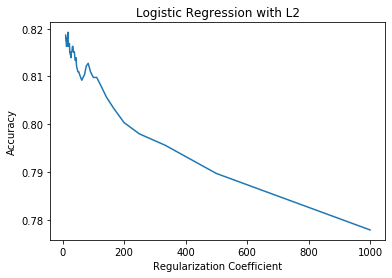

Maximum valid accuracy for validation set is at lambda value =  17.543859649122805 with accuracy = 0.8192557590076787


In [15]:
# PROBLEM 1, TASK 2 CODE GOES HERE
#for validation data set 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
lambda_c = [i / 1000 for i in range(1,100)]
lambdac=[1/i for i in lambda_c]
accuracy = []
# lambda_c = [0.01,0.05, 0.08,0.09,0.1, 0.11, 0.12,0.2]
X_train=data.iloc[:,:-1]
y_train=data.iloc[:,-1]
X_valid=data_valid.iloc[:,:-1]
y_valid=data_valid.iloc[:,-1]
X_test=data_test.iloc[:,:-1]
y_test=data_test.iloc[:,-1]

max_acc = 0
max_c = 0

for c in lambda_c:
    clf1 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf1.fit(X_train, y_train)
    acc = clf1.score(X_valid, y_valid)
    accuracy.append(acc)
    if acc > max_acc:
        max_acc = acc
        max_c = c
plt.plot(lambdac, accuracy)
plt.xlabel("Regularization Coefficient")
plt.ylabel("Accuracy")
plt.title("Logistic Regression with L2")
plt.show()
print('Maximum valid accuracy for validation set is at lambda value = ', 1/max_c, 'with accuracy =', max_acc)

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

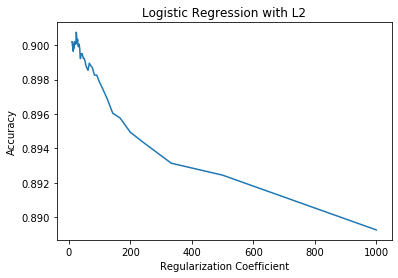

Maximum valid accuracy for validation set is at lambda value =  24.390243902439025 with accuracy = 0.9007464749792646


In [16]:
# PROBLEM 1, TASK 3 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
lambda_c1 = [i / 1000 for i in range(1,100)]
lambdac1=[1/i for i in lambda_c1]
accuracy1 = []
# lambda_c = [0.01,0.05, 0.08,0.09,0.1, 0.11, 0.12,0.2]
X_train=data1.iloc[:,:-1]
y_train=data1.iloc[:,-1]
X_valid=data1_valid.iloc[:,:-1]
y_valid=data1_valid.iloc[:,-1]


max_acc1 = 0
max_c1 = 0
for c in lambda_c1:
    clf2 = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf2.fit(X_train, y_train)
    acc1 = clf2.score(X_valid, y_valid)
    accuracy1.append(acc1)
    if acc1 > max_acc1:
        max_acc1 = acc1
        max_c1 = c
plt.plot(lambdac1, accuracy1)
plt.xlabel("Regularization Coefficient")
plt.ylabel("Accuracy")
plt.title("Logistic Regression with L2")
plt.show()
print('Maximum valid accuracy for validation set is at lambda value = ', 1/max_c1, 'with accuracy =', max_acc1)

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

[0.11667127453690904, 0.11432126071329832, 0.11321537185512856, 0.09897705280619298, 0.11376831628421344, 0.09814763616256567, 0.10962123306607686, 0.8411667127453691]


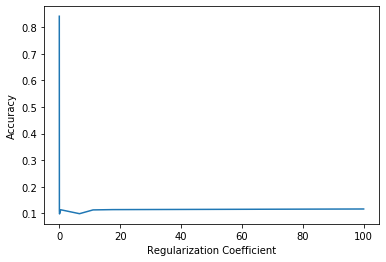

[0.11584185789328172, 0.11363008017694222, 0.10865358031517833, 0.09800940005529445, 0.1114183024606027, 0.097732927840752, 0.10478296931158419, 0.7862869781586951]


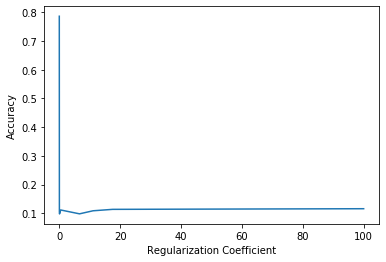

[0.11584185789328172, 0.11307713574785734, 0.10810063588609345, 0.09800940005529445, 0.11100359413878905, 0.09800940005529445, 0.10450649709704175, 0.7778545756151507]


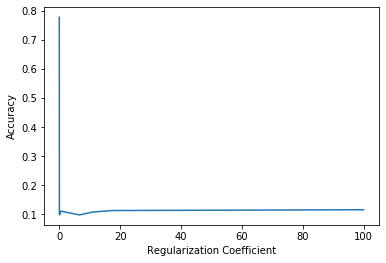

[0.11542714957146807, 0.11307713574785734, 0.10754769145700857, 0.09787116394802323, 0.11045064970970417, 0.09828587226983689, 0.1040917887752281, 0.7724633674315732]


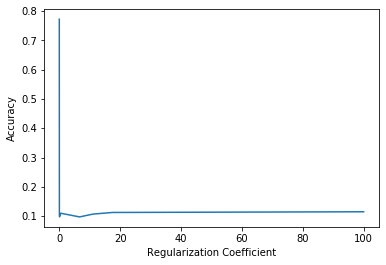

[0.11528891346419685, 0.1128006635333149, 0.10713298313519491, 0.09856234448437932, 0.10948299695880565, 0.09676527508985347, 0.10353884434614322, 0.7647221454243849]


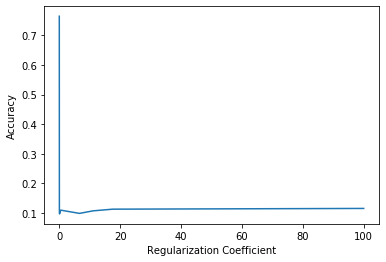

[0.11528891346419685, 0.1128006635333149, 0.10713298313519491, 0.09870058059165054, 0.10948299695880565, 0.09648880287531103, 0.10353884434614322, 0.7638927287807575]


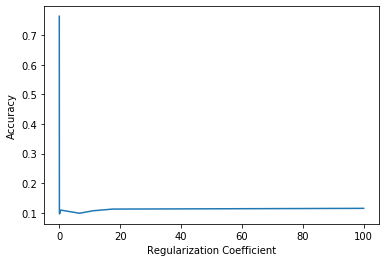

[0.11528891346419685, 0.1128006635333149, 0.10699474702792369, 0.09856234448437932, 0.10948299695880565, 0.09648880287531103, 0.10367708045341444, 0.7638927287807575]


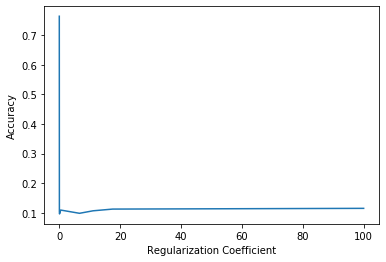

[0.11528891346419685, 0.1128006635333149, 0.10699474702792369, 0.09856234448437932, 0.10948299695880565, 0.09648880287531103, 0.10367708045341444, 0.7637544926734863]


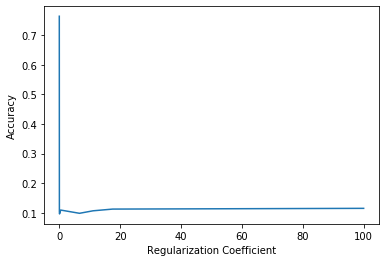

The best accuracy is achieved at accuracy value =  0.8411667127453691 with threshold =  0.99 and regularization coefficient = 100.0


In [17]:
# PROBLEM 1, TASK 4 CODE GOES HERE
from sklearn.metrics import accuracy_score
X_train=data1.iloc[:,:-1]
y_train=data1.iloc[:,-1]
X_valid=data1_valid.iloc[:,:-1]
y_valid=data1_valid.iloc[:,-1] 
accu=[]
lambdac = [0.01,0.057,0.09,0.15,2,10,17,39]
lambda_c = [1 / lam for lam in lambdac]
# print(lambda_c)
threshold = [0.05,0.1,0.2,0.55,0.15,0.60,0.30,0.99]

max_accuracy = [0,0,0]
for i in range(len(lambdac)):
    accu=[]
    new_pred = []
    for j in range(len(threshold)):
        clf3 = LogisticRegression(penalty='l2', C=lambdac[i],solver='liblinear')
        clf3.fit(X_train, y_train)
        new_pred=(clf3.predict_proba(X_valid)[:,:1]>=threshold[j])
        temp = accuracy_score(y_valid, new_pred)
        if temp > max_accuracy[0]:
            max_accuracy[0] = temp
            max_accuracy[1] = threshold[j]
            max_accuracy[2] = lambda_c[i]
        accu.append(temp)
        
    print(accu)

    
    plt.plot(lambda_c,accu)
    plt.xlabel("Regularization Coefficient")
    plt.ylabel("Accuracy")
    plt.show()
print("The best accuracy is achieved at accuracy value = ",max_accuracy[0],"with threshold = ",max_accuracy[1], "and regularization coefficient =",max_accuracy[2])

### Task 5 (Report and Conclusion) (10 points)

1.  Give a detailed report on the performance (that is, accuracy) of Models $\mathcal{A}$, $\mathcal{B}$ and $\mathcal{C}$ on the respective training sets, the validation sets and finally the test. Explain any intuition you might have on what might be happening in each of the cases. Please avoid writing unnecessary details which are not pertinent. 


The results for the accuracy of the models A,B,C are calculated below. Their performance in terms of accuracy on each of the datasets is quite similar. For every model, the training accuracy will always be the highest because we are training on the training data itself. We use validation dataset to train the model better and make sure that it is not biased on the training data. From the accuracy of the testing dataset we come to know that it is performing quite well and has trained well on the validation and testing datasets. The accuracy of testing dataset always has a value that is lower than that of training dataset for each model.


2.  Do you think accuracy, the metric which you have used to find the best hyperparameter in all the above tasks, a good metric in this scenario? Explain your choice.


Accuracy is not a good metric to find the best hyperparameter. As in case of the valid_2 dataset which was highly unbalanced with almost 95% data having prediction no. So, even if our model would have predicted 100% no values, the accuracy would have been quite high. Which should not be the case. Hence, using confusion matrix the precision and recall values should be the metric for choosing the best hyperparameter.  


In [18]:
# model A on test data 
clf1 = LogisticRegression(penalty='l2', C=max_c, solver='liblinear')
clf1.fit(X_train, y_train)

LogisticRegression(C=0.057, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
acc = clf1.score(X_test, y_test)
acc_train = clf1.score(X_train, y_train)
acc_valid = clf1.score(X_valid, y_valid)
print("Accuracy of model A on training data is = ",acc_train)
print("Accuracy of model A on validation data is = ",acc_valid)
print("Accuracy of model A on test data is = ",acc)

Accuracy of model A on training data is =  0.9024676850763808
Accuracy of model A on validation data is =  0.9000552944429084
Accuracy of model A on test data is =  0.9011390025434037


In [20]:
# model B on test data
clf2 = LogisticRegression(penalty='l2', C=max_c1, solver='liblinear')
clf2.fit(X_train, y_train)

LogisticRegression(C=0.041, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
acc = clf2.score(X_test, y_test)
acc_train = clf2.score(X_train, y_train)
acc_valid = clf2.score(X_valid, y_valid)
print("Accuracy of model B on training data is = ",acc_train)
print("Accuracy of model B on validation data is = ",acc_valid)
print("Accuracy of model B on test data is = ",acc)

Accuracy of model B on training data is =  0.9019492638418469
Accuracy of model B on validation data is =  0.9007464749792646
Accuracy of model B on test data is =  0.9005860886873825


In [22]:
# model C on test data
clf3 = LogisticRegression(penalty='l2', C=1/max_accuracy[2],solver='liblinear')
clf3.fit(X_train, y_train)
# new_pred=(clf3.predict_proba(X_test)[:,:1]>=max_accuracy[1])
# temp = accuracy_score(y_test, new_pred)
# print("Accuracy of model A on test data is = ",temp)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
new_pred=(clf3.predict_proba(X_test)[:,:1]>=max_accuracy[1])
acc = accuracy_score(y_test, new_pred)

new_pred_train=(clf3.predict_proba(X_train)[:,:1]>=max_accuracy[1])
acc_train = accuracy_score(y_train, new_pred_train)

new_pred_valid=(clf3.predict_proba(X_valid)[:,:1]>=max_accuracy[1])
acc_valid = accuracy_score(y_valid, new_pred_valid)
print("Accuracy of model C on training data is = ",acc_train)
print("Accuracy of model C on validation data is = ",acc_valid)
print("Accuracy of model C on test data is = ",acc)

Accuracy of model C on training data is =  0.8396004700352526
Accuracy of model C on validation data is =  0.8411667127453691
Accuracy of model C on test data is =  0.8368904124737366


## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

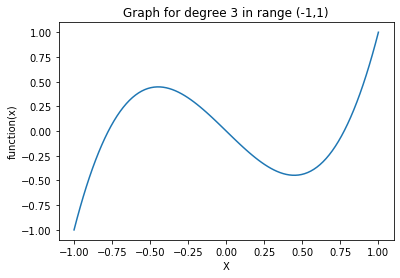

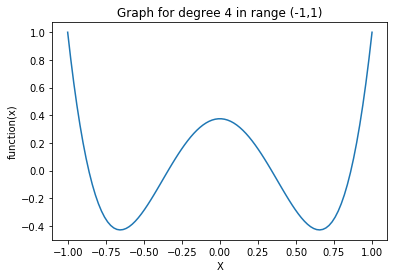

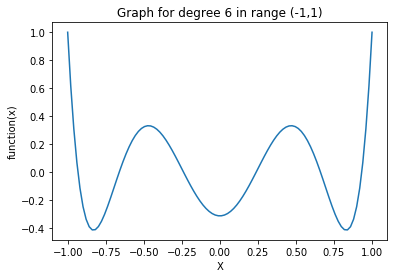

In [24]:
import numpy as np
from scipy.special import legendre
import math
import matplotlib.pyplot as plt 
def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    x = np.linspace(low,high,num = 100)
    w = get_coefficients(degree)
    power_x=[]
    y = []
    for i in range(len(x)):
        power_x = []
        for j in range (0,degree+1):
            power_x.append(w[j]*math.pow(x[i],j))
        y.append(sum(power_x))
    plt.title("Graph for degree "+ str(degree) +" in range ("+ str(low) + "," + str(high) +")")
    plt.plot(x,y)
    plt.xlabel("X")
    plt.ylabel("function(x)")
      
## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
plt.show()
visualize_function(4, -1, 1)
plt.show()
visualize_function(6, -1, 1)
plt.show()

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [25]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    
    low = -1
    high = 1
    y_test = []
    y_train = []
    X_train =[]
    X_test = []
    X = np.linspace(low,high,num = n_train + n_test)
    for i in range(0,len(X),2):
        X_train.append(X[i])
    for i in range(1,len(X),2):
        X_test.append(X[i])
#     X_train = np.linspace(low,high,num = n_train)
#     X_test = np.linspace(low,high,num = n_test)
    w = get_coefficients(degree)
    power_xtrain=[]
    power_xtest=[]
    
    if sigma != 0:
        noise_train = np.random.normal(loc=0,scale=sigma,size=n_train)
        noise_test = np.random.normal(loc=0,scale=sigma,size=n_test)
        
        for i in range(len(X_train)):
            power_xtrain = []
            for j in range (0,degree+1):
                power_xtrain.append(w[j]*math.pow(X_train[i],j))
            power_xtrain = sum(power_xtrain) + noise_train[i]
            y_train.append(power_xtrain)


        for i in range(len(X_test)):
            power_xtest = []
            for j in range (0,degree+1):
                power_xtest.append(w[j]*math.pow(X_test[i],j))
            power_xtest = sum(power_xtest) + noise_test[i]
            y_test.append(power_xtest)

    else:
        for i in range(len(X_train)):
            power_xtrain = []
            for j in range (0,degree+1):
                power_xtrain.append(w[j]*math.pow(X_train[i],j))
            power_xtrain = sum(power_xtrain)
            y_train.append(power_xtrain)


        for i in range(len(X_test)):
            power_xtest = []
            for j in range (0,degree+1):
                power_xtest.append(w[j]*math.pow(X_test[i],j))
            power_xtest = sum(power_xtest)
            y_test.append(power_xtest)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test

### Task 3 (20 points)

1.   Use the function written in Task 2 to generate a dataset of degree $10$, with $20$ samples each in the training and test sets. The standard deviation of the noise should be $0.2$.
2.   Plot the generated points of the train set over the function. Make use the function you wrote in Task 1 to do so. The resultant plot should not only contain the function in blue color but also the generated points in the train set in red color.
3.   Fit two linear regressions models: $\mathcal{A}$ and $\mathcal{B}$ on the given training data. Model $\mathcal{A}$ should be quadratic and Model $\mathcal{B}$ should be of degree $10$. How would you create such models?
4. Calculate the training error and testing error on both these models and report them nicely in a table.
5. Explain the results:
 - Are the results as expected or surprising? Explain your stance. 


Answer :


The result is as expected. The error for the test data is more than that of train which is almost always the case. The error set for polynomial of degree 2 has values greater than that of 10. This is obvious as polynomial of degree 10 can fit points better than that of degree 2 for the same training set. 
 - Give a detailed explanation of why this happens.


Answer :


We have calculated the polynomial function f(x) that is, the curve and the points to be plotted with the same legendre coefficients. The only difference is the noise that is present because of which the points do not lie on the line and deviate from the line. As we increase the degree of the polynomial it will fit more points, but that might not always be ideal as it may lead to overfitting.


 **Hint**: You are free (in fact encouraged) to design new experiments under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

 
Note: _There is no preference over the size of the answer but please note that you shouldn't write anything that is not pertinent. While being terse, your answer should clearly convey the intuition. Also, use logical number code/text cells---i.e. every subquestion in a given task which can be considered a logical unit should be present in one cell. Do not make one cell unnecessarily long by putting multiple answers in it or split a given answer over multiple cells. Use your best judgement.

train error 0.11698510357182612
test error 0.13868591232179134
train error 0.004990912334012783
test error 0.1934938119717766


,degree,train_error,test_error
0,2,0.116985,0.138686
1,10,0.004991,0.193494


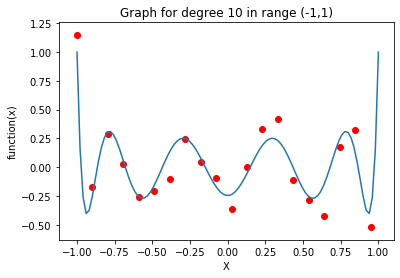

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
X_train, y_train, X_test, y_test = generate_dataset(10,20,20,0.2)


visualize_function(10,-1,1)
plt.scatter(X_train,y_train,color="red")

X_train = X_train.reshape(len(X_train),1)
X_test = X_test.reshape(len(X_test),1)


# model A
model_A = PolynomialFeatures(2)
X_trainA= model_A.fit_transform(X_train)

X_testA= model_A.fit_transform(X_test)


linear_A= LinearRegression().fit(X_trainA,y_train)
y_pred_train = linear_A.predict(X_trainA)
train_error = mean_squared_error(y_train,y_pred_train)
# print("train error",train_error)
y_pred_test = linear_A.predict(X_testA)
test_error = mean_squared_error(y_test,y_pred_test)
# print("test error",test_error)

# model B
model_B = PolynomialFeatures(10)
X_trainB= model_B.fit_transform(X_train)

X_testB= model_B.fit_transform(X_test)


linear_B= LinearRegression().fit(X_trainB,y_train)
y_pred_train = linear_B.predict(X_trainB)
train_error1 = mean_squared_error(y_train,y_pred_train)
# print("train error",train_error1)
y_pred_test = linear_B.predict(X_testB)
test_error1 = mean_squared_error(y_test,y_pred_test)
# print("test error", test_error1)

data = [[2, train_error,test_error], [10, train_error1, test_error1]]

df = pd.DataFrame(data, columns=['degree', 'train_error', 'test_error'])

df.head()

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.
3.  This target doesn't have noise like the previous one. Does this make the result surprising? Explain your stance. Also give a detailed explanation of why this happens. 


Again the result is not surprising here. Because there is zero noise, the polynomial with degree 45 will fit all the points. But, for the train and test error, using a model with degree 2 and 10, the models will give us a huge error. Because we are fitting data which is generated using degree 45 with 2 and 10 degree models. They will always underfit and have a huge error.

**Hint**: You are free (in fact encouraged) to design new experiements under the same paradigm to understand what is happening. You can buttress your explanation with any plots which you might generate from such new experiments.

,degree,train_error,test_error
0,2,1.508552e+09,5.502541e+08
1,10,2.084242e+06,5.964186e+07


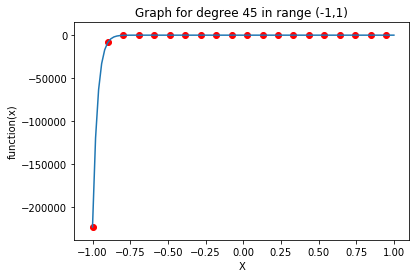

In [35]:
X_train45, y_train45, X_test45, y_test45 = generate_dataset(45,20,20,0)

visualize_function(45,-1,1)
plt.scatter(X_train45,y_train45,color="red")

X_train45 = X_train45.reshape(len(X_train45),1)
X_test45 = X_test45.reshape(len(X_test45),1)

# model A
model_A = PolynomialFeatures(2)
X_trainA45= model_A.fit_transform(X_train45)
# X_trainA45.shape

X_testA45= model_A.fit_transform(X_test45)
X_testA45.shape

linear_A= LinearRegression().fit(X_trainA45,y_train45)
y_pred_train45 = linear_A.predict(X_trainA45)
train_error45 = mean_squared_error(y_train45,y_pred_train45)
y_pred_test45 = linear_A.predict(X_testA45)
test_error45=mean_squared_error(y_test45,y_pred_test45)

# model B
model_B = PolynomialFeatures(10)
X_trainB45= model_B.fit_transform(X_train45)

X_testB45= model_B.fit_transform(X_test45)


linear_B= LinearRegression().fit(X_trainB45,y_train45)
y_pred_train45 = linear_B.predict(X_trainB45)
train_error145=mean_squared_error(y_train45,y_pred_train45)
y_pred_test45 = linear_B.predict(X_testB45)
test_error145=mean_squared_error(y_test45,y_pred_test45)

data = [[2,train_error45,test_error45], [10, train_error145, test_error145]]

df = pd.DataFrame(data, columns=['degree', 'train_error', 'test_error'])

df.head()